In [ ]:
pip install geopandas

In [33]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\lefeb\anaconda3\lib\site-packages\mobiusmodule-0.0.0-py3.12-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


# Initialisation

In [1]:
import geopandas
import pandas as pd
path = "C:/Users/lefeb/OneDrive/Documents/Sykinet/" # A changer

ModuleNotFoundError: No module named 'geopandas'

In [10]:
#Base RGA

df_RGA = geopandas.read_file(path + "base sykinet/AleaRG_Fxx_L93.zip")
df_RGA

,DPT,NIVEAU,ALEA,geometry
0,64,2.0,Moyen,"POLYGON ((415042.403 6217177.504, 415029.038 6..."
1,67,2.0,Moyen,"POLYGON ((997223.596 6867911.324, 997197 68680..."
2,60,1.0,Faible,"POLYGON ((605685.986 6945445.364, 605528 69454..."
3,25,1.0,Faible,"POLYGON ((944099.542 6642886.31, 944099.49 664..."
4,05,2.0,Moyen,"POLYGON ((925982.013 6402615.454, 925976.423 6..."
...,...,...,...,...
122217,13,2.0,Moyen,"POLYGON ((858511.088 6264205.306, 858491.801 6..."
122218,13,2.0,Moyen,"POLYGON ((859269.238 6263776.624, 859269.23 62..."
122219,13,2.0,Moyen,"POLYGON ((894861.215 6263726.175, 894844.563 6..."
122220,13,2.0,Moyen,"POLYGON ((886891.456 6261385.522, 886874.879 6..."


In [13]:
#Base innondation

dep = [f"{i:02d}" for i in range(1, 96) if i != 20]
dep.insert(19, "2A")  # après "19"
dep.insert(20, "2B")  # après "2A"

df_innondation=pd.DataFrame()
for departement in dep :
  path_innond = path+"base sykinet/Dept_"+departement+".zip!VECTEUR"
  file = geopandas.read_file(path_innond)
  file["dep"]=departement
  df_innondation=pd.concat([df_innondation,file])
df_innondation.to_csv(path+"Output intermediaires/base_innondation.csv")
df_innondation

,CLASSE,FIAB_MNT,FIAB_ESO,FIAB_TOT,CLASSEFIAB,gridcode,geometry,dep
0,Zones potentiellement sujettes aux inondations...,FAIBLE,FAIBLE,FAIBLE,Zones potentiellement sujettes aux inondations...,2,"MULTIPOLYGON (((904643.319 6504737.5, 904533 6...",01
1,Zones potentiellement sujettes aux débordement...,FAIBLE,FAIBLE,FAIBLE,Zones potentiellement sujettes aux débordement...,1,"POLYGON ((904717.1 6504693.143, 904667 6504717...",01
2,Zones potentiellement sujettes aux inondations...,FAIBLE,FAIBLE,FAIBLE,Zones potentiellement sujettes aux inondations...,2,"POLYGON ((905217.1 6505737.5, 905217.1 6505487...",01
3,Zones potentiellement sujettes aux inondations...,FAIBLE,FAIBLE,FAIBLE,Zones potentiellement sujettes aux inondations...,2,"POLYGON ((904467.1 6505737.5, 904467.1 6505987...",01
4,Zones potentiellement sujettes aux inondations...,FAIBLE,FAIBLE,FAIBLE,Zones potentiellement sujettes aux inondations...,2,"POLYGON ((905217.1 6505737.5, 905217.1 6505987...",01
...,...,...,...,...,...,...,...,...
1572,Zones potentiellement sujettes aux débordement...,FAIBLE,FORTE,MOYENNE,Zones potentiellement sujettes aux débordement...,1,"POLYGON ((633467.1 6899987.5, 633467.1 6900237...",95
1573,Zones potentiellement sujettes aux débordement...,FAIBLE,FORTE,MOYENNE,Zones potentiellement sujettes aux débordement...,1,"POLYGON ((632967.1 6900237.5, 632967.1 6900737...",95
1574,Zones potentiellement sujettes aux inondations...,FAIBLE,FORTE,MOYENNE,Zones potentiellement sujettes aux inondations...,2,"MULTIPOLYGON (((634790.171 6899237.5, 634871 6...",95
1575,Zones potentiellement sujettes aux débordement...,FAIBLE,FORTE,MOYENNE,Zones potentiellement sujettes aux débordement...,1,"MULTIPOLYGON (((648717.1 6897487.5, 648967.1 6...",95


In [ ]:
df_foncier=pd.read_csv(path+"base sykinet/dvf.csv.gz")
df_foncier

C:\Users\lefeb\AppData\Local\Temp\ipykernel_14480\2842753367.py:1: DtypeWarning: Columns (10,12,14,16,17,18,20,22,24,26,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_foncier=pd.read_csv(path+"base sykinet/dvf.csv.gz")


# Visualisation

<Axes: >

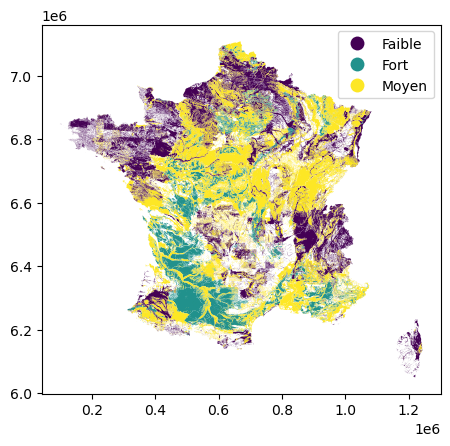

In [16]:
df_RGA.plot(column="ALEA", 
         legend=True,          # affiche la légende
         cmap="viridis")          # choix du colormap (ex : 'Set1', 'viridis', 'Accent'…)

In [29]:
df_innondation[lambda x:x["gridcode"]==1]["CLASSE"].unique()

array(['Zones potentiellement sujettes aux débordements de nappe'],
      dtype=object)

<Axes: >

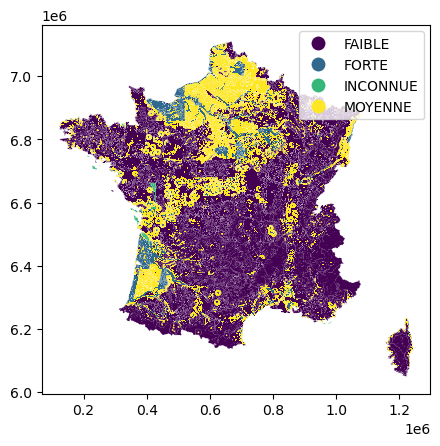

In [19]:
df_innondation.plot(column="FIAB_TOT",
                    legend=True,          # affiche la légende
                    cmap="viridis") 